Author: ****

# 4. Data visualisation and peak fitting

### Goals

- create your first own Git repository
- reading iSCAMS data from a file and rescale the values
- plot a histogram using the package *matplotlib* and save the plot to a file
- fit a gaussian function to the histogram with the package *scipy* and determine the average protein mass

### Introduction

In this folder you will find the file ``hsp165.txt`` that contains the interferometric contrasts of single proteins (HSP 16.5) measured by iSCAMS (stands for interferometric scattering mass spectrometry). The interferometric contrast is proportional to the particle mass (for this measurement an interferometric contrast of $\approx2.2\times10^{-5}$ corresponds to a protein mass of 1 kDa.

In [1]:
# Before we start we need to import the maths library
import numpy
# a library with tools for scientific data analysis
import scipy

### *TASK 1*

Load the interferometric contrasts from the file into a *numpy-array* of floating point values. Determine the number of values in the array and confirm that the number matches the number of lines in the file ``hsp165.txt`` (check this number for example by opening the file in a text editor).

In [6]:
with open('hsp165.txt', 'r') as f:
    print(f"Number of lines: {len(f.readlines())}")

data = numpy.loadtxt('hsp165.txt')
print(f"Number of values: {len(data)}")


Number of lines: 2474
Number of values: 2474


### *TASK 2*

Convert the measured interferometric contrasts into the unit kDa and and use the *numpy-array* methods to determine the 

- minimum
- maximum
- mean
- standard deviation

of the converted values and print your results to the screen.

In [11]:
scaling_factor = 2.2E-5 # per kDa
masses = data / scaling_factor

print(f"Minimum mass: {masses.min():.1f} kDa")
print(f"Maximum mass: {masses.max():.1f} kDa")
print(f"Mean mass: {masses.mean():.1f} kDa")
print(f"Standard deveiation of masses: {masses.std():.1f} kDa")

Minimum mass: 51.2 kDa
Maximum mass: 2350.8 kDa
Mean mass: 398.3 kDa
Standard deveiation of masses: 89.5 kDa


### *TASK 3*

a) Use the function [*matplotlib.pyplot.hist*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to display the histogram of the measured values.

b) Adjust the parameters ``bins`` and ``range`` to improve your plot.


c) Annotate your axes by using the functions [*matplotlib.pyplot.xlabel*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) and [*matplotlib.pyplot.ylabel*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html).

d) Save the histogram to a PNG file ``hist_hsp.png`` at 400 dpi resolution (search on the web for the suitable *matplotlib* function).

In [12]:
# Import of the matplotlib package for plotting
import matplotlib
# and magic to activate inline-plotting between the notebook cells
%matplotlib inline

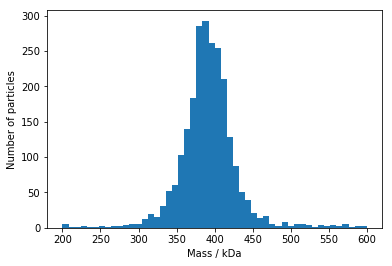

In [35]:
# a) and b) Calculate and plot histogram and adjust bins and range
matplotlib.pyplot.hist(masses, bins=50, range=(200, 600))
# c) Annotate axes
matplotlib.pyplot.xlabel('Mass / kDa')
matplotlib.pyplot.ylabel('Number of particles')
# d) Save to file
matplotlib.pyplot.savefig('histogram_SOLVED.png', dpi=400)

**This is the saved figure as PNG image inserted into a markdown cell:**

<img src="histogram_SOLVED.png" width=400>

### *TASK 4*

a) The function [*matplotlib.pyplot.hist*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) returns three objects. We are interested in the first two:

  - *numpy-array* of histogram values (number of particles that had a mass within the limits of the respective bin)
  - *numpy-array* of the limits of the histogram bins

 Save the two arrays as ``hist`` and ``m_edges`` and check their lengths. Why are they not the same?
 Save the third array into the variable ``_``.
 
b) Calculate the *numpy-array* ``m_centers`` with values between the values of ``m_edges`` and a length ``len(m_edges)-1``.

c) Make a line plot of ``m_centers`` vs. ``hist`` by using the function [*matplotlib.pyplot.plot*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). 

d) Label the axes.

e) Use the same function as in *TASK 3* to save the plot to the PNG file ``hist_hsp_line.png`` at 400 dpi resolution.

The length of hist is: 50
The length of m_edges is: 51


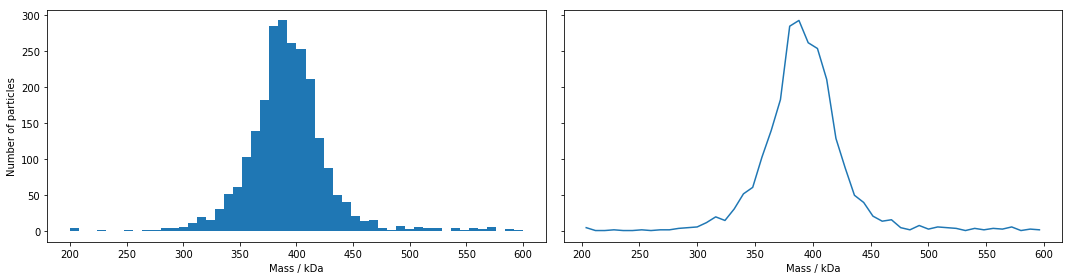

In [66]:
# Initialise figure and axes
fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2, figsize=(15, 4), sharey=True)

# a) Assign output variables of matplotlib.pyplot.hist() to hist, m_edges, and _
hist, m_edges, _ = ax1.hist(masses, bins=50, range=(200, 600))
print(f"The length of hist is: {len(hist)}")
print(f"The length of m_edges is: {len(m_edges)}")

# b) Determine the center positions and save them as m_centers 
m_centers = m_edges[:-1] + (m_edges[1]-m_edges[0])/2

# c) Make a line plot of the histogram
ax2.plot(m_centers, hist)

# d) Label the axes
ax1.set_xlabel('Mass / kDa')
ax1.set_ylabel('Number of particles')
ax2.set_xlabel('Mass / kDa')

# e) Save to PNG
matplotlib.pyplot.tight_layout()
fig.savefig('hist_hsp_line.png', dpi=400)

**This is the saved figure as PNG image inserted into a markdown cell:**

<img src="hist_hsp_line.png" width=800>

### *TASK 4*

In taks 5 we want to determine the mass of HSP 16.5 by fitting a Gaussian function to the histogram.

The Gaussian function is defined as 

$$g(x) = A_0 \exp\left( -\frac{\left(m-m_0\right)^2}{2 \sigma^2} \right)$$

a) Write a corresponding Python function ``gauss(m, A0, m0, sigma)`` that returns $g(x)$.

b) Assign the default values $A_0=1$, $m_0=0$, $\sigma=2$.

c) Confirm that the function returns the value $e^{-1/2}\approx0.88$ for $m=1$, $A_0=1$, $m_0=0$, and $\sigma=2$. 

In [83]:
# a) and b) Write and test the function gauss(m, A0, m0, sigma) and assign default values
import numpy
def gauss(m, A0=1, m0=0, sigma=2):
    return A0*numpy.exp(-(m-m0)**2/(2*sigma**2))

# c) Test the function
test_result = gauss(1)
print(f"gauss(1, 1, 0, 2) = {test_result}")
assert numpy.isclose(test_result, 0.88, atol=0.051), "The function gauss() has not passed the test."

gauss(1, 1, 0, 2) = 0.8824969025845955


### *TASK 5*

The function [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) can solve nonlinear least-squares problems. We will use this function to identify the Gaussian model (with parameters $A_0$, $m_0$, and $\sigma$) that best matches the measured data. The fitted values $m_0$ and $\sigma$ provide estimates for the mass of HSP 16.5 and the spread of the measured values, respectively.

a) Define a function ``err(x)`` that calculates the fit residual (difference of fit and measured data). For using this function later to call [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) the argument of ``err`` has to be a tuple of all model parameters, here ``x=(A0, m0, sigma)``.

b) For convergence to the correct solution a guess for the model parameters has to be passed to [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). Define a starting guess ``x0`` as a tuple of three guessed values for $A_0$, $m_0$, and $\sigma$. Use the plot that you generated in *TASK 4* to guess the parameters.

c) Call ``(A0_fit, m0_fit, sigma_fit) = scipy.optimize.least_squares(err, x0).x`` and both data and result with consecutive calls of [*matplotlib.pyplot.plot*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

d) Plot the fitting result together with your data.

e) Print the fitted parameters $m_0$ and $\sigma$ to the screen and compare to the values obtained in *TASK 2*.

**Advanced**: Make a legend by using the ``label`` parameter of [*matplotlib.pyplot.plot*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) and by calling at the end of the cell [*matplotlib.pyplot.legend*](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).

Center mass: 391.2 kDa
Peak standard deviation: 24.7 kDa


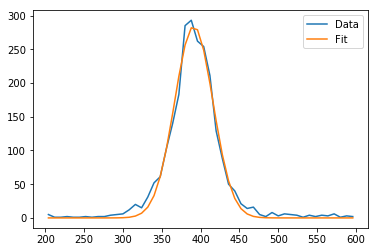

In [104]:
# a) Define err(x)
def err(x):
    return (hist-gauss(m_centers, A0=x[0], m0=x[1], sigma=x[2]))

# b) Make a guess
A0_guess = 800
m0_guess = 400
sigma_guess = 100
x0 = (A0_guess, m0_guess, sigma_guess)

# c) Least-squared optimisation
import scipy.optimize
(A0_fit, m0_fit, sigma_fit) = scipy.optimize.least_squares(err, x0).x

# d) Plot result and data
matplotlib.pyplot.plot(m_centers, hist, label='Data')
hist_fit = gauss(m_centers, A0_fit, m0_fit, sigma_fit)
matplotlib.pyplot.plot(m_centers, hist_fit, label='Fit')
matplotlib.pyplot.legend()

# e) Print fitting values
print(f"Center mass: {m0_fit:.1f} kDa")
print(f"Peak standard deviation: {sigma_fit:.1f} kDa")
